In [31]:
import time
import numpy as np
import scipy      #some scientific functions
import matplotlib.pyplot as plt #matlab's plotting library
import csv        #read csv files

In [32]:
with open("pseudo data/10 legraises left leg second set.csv") as f:
    reader = csv.reader(f)
    next(reader) # skip header
    next(reader)
    upper_leg_data = np.array([r for r in reader]).astype(np.float) #np.array converts list to array to avoid "TypeError: list indices must be integers or slices, not tuple"

with open("pseudo data/10 legraises left leg lower leg.csv", newline='') as g:
    reader = csv.reader(g)
    next(reader) # skip header
    next(reader)
    lower_leg_data = np.array([r for r in reader]).astype(np.float) #x.astype(np.float) converts array of strings to floats

In [38]:
n=1

uld = upper_leg_data[0::n,[0, 1, 2]]  #in python it is start:end:spacing, NOT start:spacing:end
lld = lower_leg_data[0::n,[0, 1, 2]]

ufs = upper_leg_data[0::n,[3]]
lfs = lower_leg_data[0::n,[3]]

time_ul = np.linspace(0, max(uld[:,0]), len(uld[:,0]))
time_ll = np.linspace(0, max(lld[:,0]), len(lld[:,0])) #need to change this because we dont know the time

#there is no time data here annoyingly, find out later

##  Functions

In [39]:
def plot_upper_and_lower_legs(up_leg_t, up_leg, low_leg_t, low_leg, ticks):
    fig = plt.figure(figsize=(18,6))    #change figure size
    
    #find the max_value and min_value
    # max_value = max(max(up_leg), max(low_leg));    min_value = min(min(up_leg), min(low_leg))
    
    #plt.xticks(np.arange(min_time, max_time, step=1))  #only plot the data label for every second
    #plt.yticks(np.arange(min_value, max_value, step=ticks))  #arrange(start, stop, step)
    
    plt.plot(time_ul, up_leg);          
    plt.plot(time_ll, low_leg) #plot data
    plt.plot(time_ul, np.zeros(len(up_leg)), 'c--')                       #plot zero line
    
    plt.legend(['upper leg', 'lower leg']);
    plt.xlabel('Time (s)');

In [46]:
def trapezium_integration(times, values):
    
    integrand = np.zeros(len(values));
    #integrand[0] = values[0];
    for i in range(len(values)-1):
        trapezium = 0.5 * (values[i]+values[i+1]) * (times[i+1]-times[i])
        integrand[i+1] = integrand[i] + trapezium;
        
    return integrand

In [70]:
def smooth(x, window_len=11, window='hanning'):
 
        if x.ndim != 1:
            raise #ValueError, "smooth only accepts 1 dimension arrays."
        if x.size < window_len:
            raise #ValueError, "Input vector needs to be bigger than window size."
        if window_len<3:
            return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
            raise #ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"

        s=np.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
            w=np.ones(window_len,'d')
        else:  
            w=eval('np.'+window+'(window_len)')
        y=np.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

In [81]:
def dist(a,b):
    return math.sqrt((a*a)+(b*b))
 
def get_y_rotation(x,y,z):
    radians = math.atan2(x, dist(y,z))
    return -math.degrees(radians)
 
def get_x_rotation(x,y,z):
    radians = math.atan2(y, dist(x,z))
    return math.degrees(radians)

## Raw Accelerometer Measurement

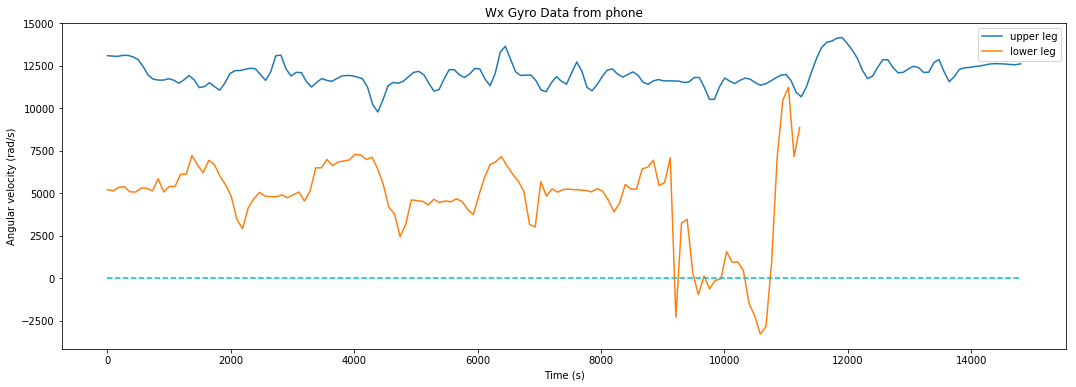

In [80]:
smoothed_ul = smooth(uld[:,0], window_len=6)

plot_upper_and_lower_legs(time_ul, smoothed_ul, time_ll, lld[:,0], 0.3) #fn(up_leg_t, up_leg, low_leg_t, low_leg, ticks)

plt.title('Wx Gyro Data from phone');
plt.ylabel('Angular velocity (rad/s)');      
          
plt.show()

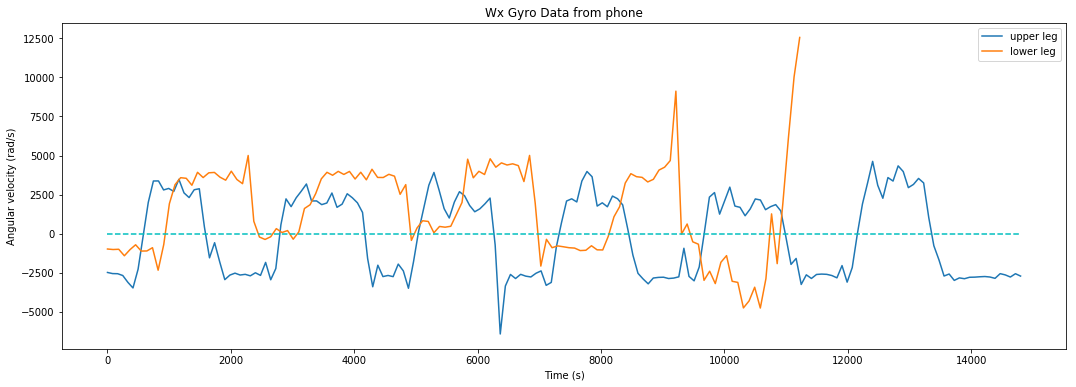

In [41]:
plot_upper_and_lower_legs(time_ul, uld[:,1], time_ll, lld[:,1], 0.3) #fn(up_leg_t, up_leg, low_leg_t, low_leg, ticks)

plt.title('Wx Gyro Data from phone');
plt.ylabel('Angular velocity (rad/s)');      
          
plt.show()

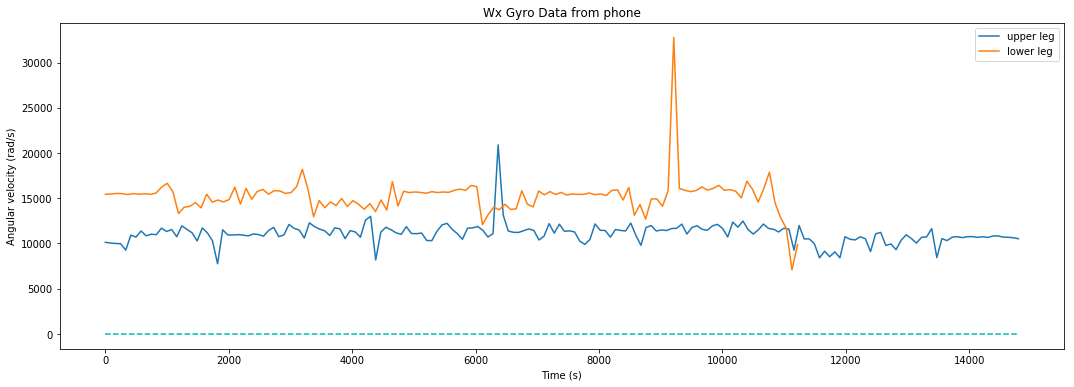

In [42]:
plot_upper_and_lower_legs(time_ul, uld[:,2], time_ll, lld[:,2], 0.3) #fn(up_leg_t, up_leg, low_leg_t, low_leg, ticks)

plt.title('Wx Gyro Data from phone');
plt.ylabel('Angular velocity (rad/s)');      
          
plt.show()

##  Raw Flex Sensor Data

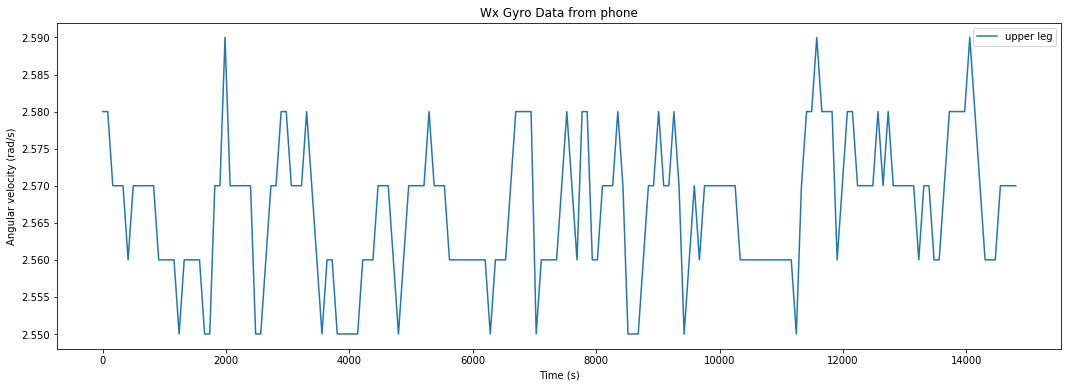

In [45]:
fig = plt.figure(figsize=(18,6))    #change figure size   
    
plt.plot(time_ul, ufs);          
#plt.plot(time_ll, lfs) #plot data
#plt.plot(time_ul, np.zeros(len(ufs)), 'c--')                       #plot zero line
    
plt.legend(['upper leg', 'lower leg']);
plt.xlabel('Time (s)');
    
plt.title('Wx Gyro Data from phone');
plt.ylabel('Angular velocity (rad/s)');      
          
plt.show()